## tp_9 consigne:realiser le feature engineering ,appliquer un modele de machine learning
## tp_9 realiser par kamga fotso francis

In [219]:
## importations des bibliotheques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#importation des differentes metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#import nearmiss(pour faire undersample
from imblearn.under_sampling import NearMiss
# Construire le classificateur de forêt aléatoire (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
#import randomOversample pour faire oversample
from imblearn.over_sampling import RandomOverSampler
#pour selectionner nos feature
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Feature Engineering


In [3]:
#chargement de notre dataset


data=pd.read_csv("diabetes.csv")
data1=data.copy()

# affichage des 05 premiers enregistrements
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#affichage des dimensions de notre dataset
print("la dimension de notre dataset est",data.shape)
#notre dataset possede 768 observation et 9 features

la dimension de notre dataset est (768, 9)


In [5]:
# affichage de quelques infomations sur notre dataset
data.info()
# ici on constate que notre dataset ne contient pas de valeur manquante
#notre dataset comporte que des numerical_value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#descriptions des donnees
data.describe()
#les moyennes de nos features varie entre 0.34 et 120.89
#les ecart types de nos feature varie entre 0.33 et 115.244002

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# verifions notre dataset contient des valeurs doubles
data_double=data.duplicated()
print("le nombre de valeur double est",data_double.sum())

le nombre de valeur double est 0


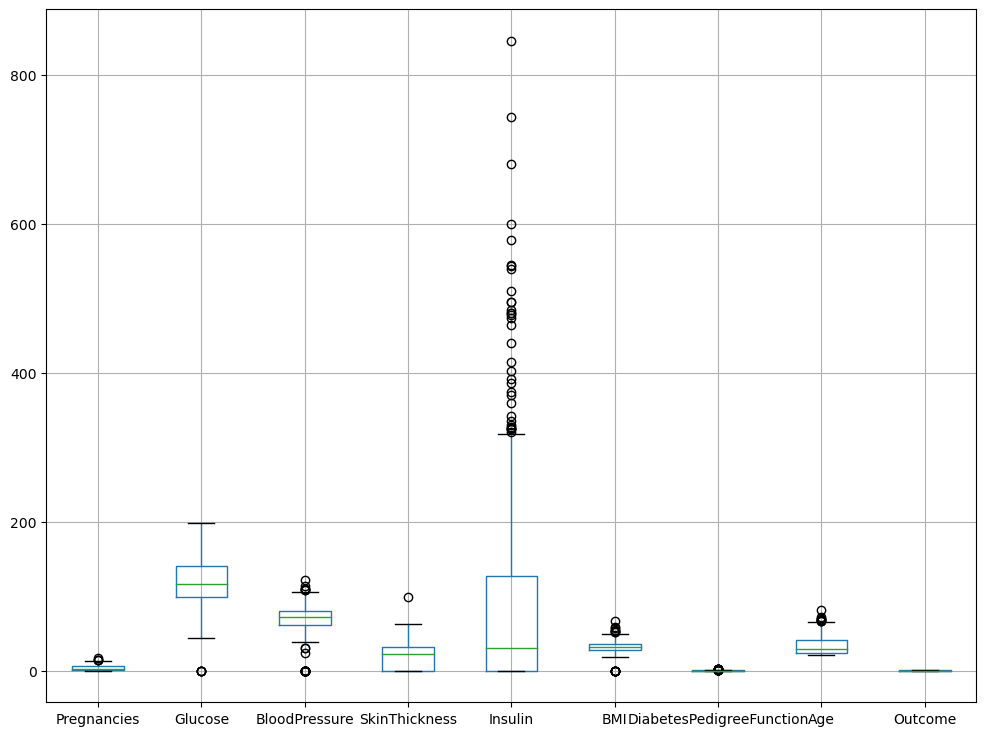

In [8]:
#affichage des valeurs aberrantes
fig = plt.figure(figsize = (12, 9))
data.boxplot()
plt.show()
#presence de valeur aberrantes

In [9]:
#affichons l accuracy de notre modele avec les aberantes
#separation de nos donnees
xTrain,xTest,yTrain,yTest=train_test_split(data.drop("Outcome",axis=1),data["Outcome"],test_size=0.3,random_state=0)

classifier=LogisticRegression(random_state=0,solver='liblinear')
# entrainement de notre modele
classifier.fit(xTrain,yTrain)
#prediction par notre modele
y_pred=classifier.predict(xTest)

acc = accuracy_score(yTest, y_pred)
print("la precision pour notre modele logistiregression  avec la presence des valeurs aberante est",acc)

la precision pour notre modele logistiregression  avec la presence des valeurs aberante est 0.7835497835497836


In [10]:
#supprimons les valeurs aberantes
def input_outlier(df,data):
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df[data], 25)
    Q3 = np.percentile(df[data], 75)
    IQR = Q3 - Q1
    # Upper bound
    
    upper=Q3+1.5*IQR
    # Lower bound
    lower=Q1-1.5*IQR
    df[data]=np.where(df[data] > upper, upper, np.where(df[data] < lower, lower, df[data]))

In [11]:
# remplacer chaque valeurs aberrantes dans chaque colonne
column1=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for i in range(len(column1)):
    
    input_outlier(data1,column1[i])
    

In [12]:
#affichons l accuracy de notre modele avec les aberantes
#separation de nos donnees
xTrain,xTest,yTrain,yTest=train_test_split(data1.drop("Outcome",axis=1),data1["Outcome"],test_size=0.3,random_state=0)

classifier=LogisticRegression(random_state=0,solver='liblinear')
# entrainement de notre modele
classifier.fit(xTrain,yTrain)
#prediction par notre modele
y_pred=classifier.predict(xTest)

acc = accuracy_score(yTest, y_pred)
print("la precision pour notre modele logistiregression  avec la presence des valeurs aberante est",acc)
#la suppression des valeurs aberantes diminu la performance de notre modele

la precision pour notre modele logistiregression  avec la presence des valeurs aberante est 0.7748917748917749


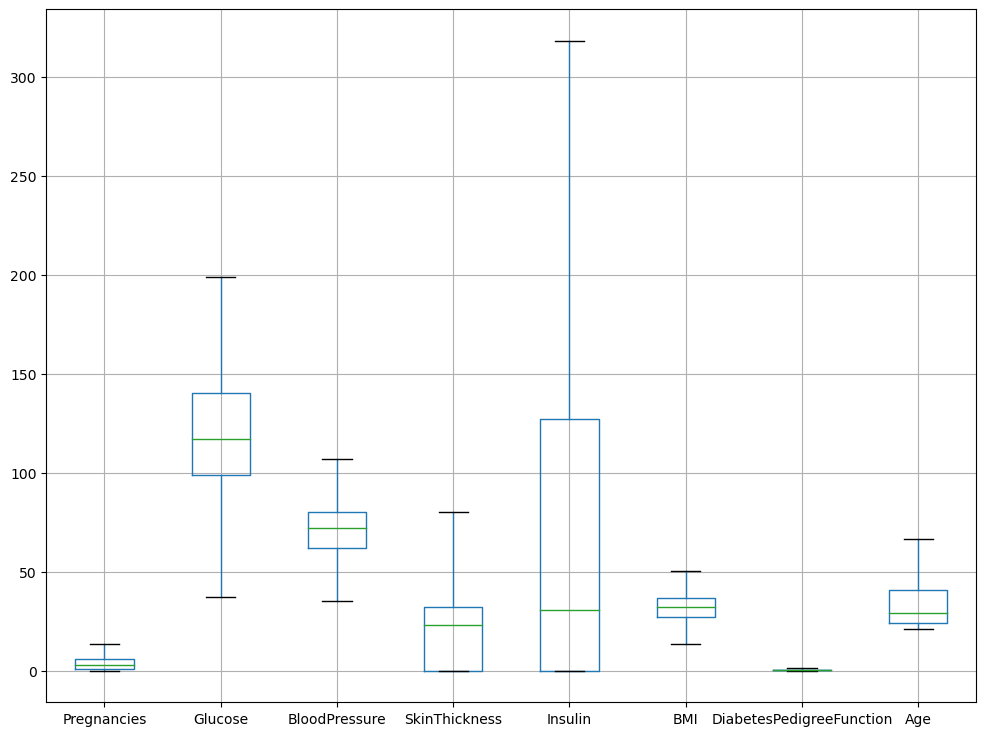

In [231]:
#verifions si nos valeurs aberrantes ont ete supprime
fig = plt.figure(figsize = (12, 9))
data1.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()
#nos valeurs aberrantes ne sont plus presente


In [232]:
#affichons l accuracy de notre modele sans  les aberantes
#separation de nos donnees
xTrain,xTest,yTrain,yTest=train_test_split(data1.drop("Outcome",axis=1),data1["Outcome"],test_size=0.3,random_state=0)

classifier.fit(xTrain,yTrain)
#prediction par notre modele
y_pred=classifier.predict(xTest)

acc = accuracy_score(yTest, y_pred)
print("la precision pour notre modele logistiregression  sans des valeurs aberante est",acc)
#la suppression des valeurs aberantes diminu la performance de notre modele

la precision pour notre modele logistiregression  sans des valeurs aberante est 0.7748917748917749


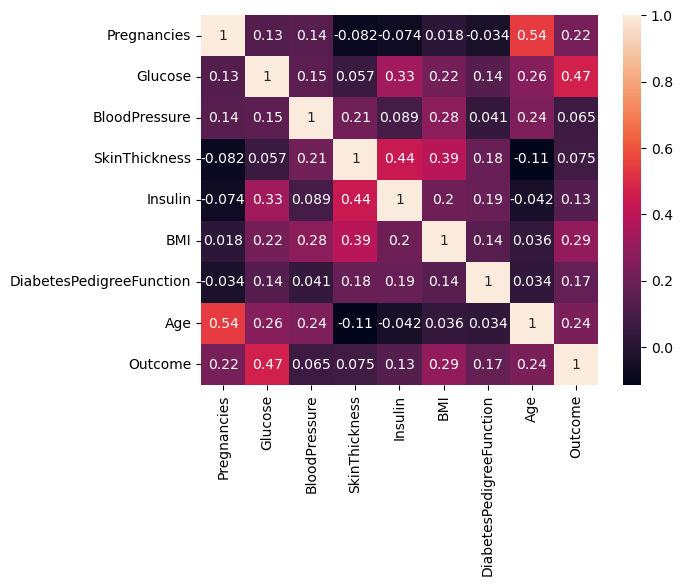

In [233]:
#verifions la correlation entre les variables independantes
coorma=data.corr()
sns.heatmap(coorma,annot=True)
plt.show()
#absence de correlation entre nos feature(observations)

In [268]:
#petit analyse pour choisir nos feature


sfs1 = sfs(classifier, k_features=8, forward=True, verbose=2, scoring='accuracy')
sfs1 = sfs1.fit(data.drop("Outcome",axis=1),data["Outcome"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-03-18 21:56:38] Features: 1/8 -- score: 0.7448688566335625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-03-18 21:56:38] Features: 2/8 -- score: 0.7552245140480435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-03-18 21:56:38] Features: 3/8 -- score: 0.7656650539003479[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [260]:
print("les features selectionnees sont",list(sfs1.k_feature_names_))

les features selectionnees sont ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


In [270]:
#la nouvelle dataset obenu apres supressions de certains features
data2=data.drop(["Age",'SkinThickness'],axis=1)


In [271]:
#verifions si notre dataset est desiquilibre
#verifions si notre dataset est en desequilibre
print("le pourcentage de personne qui ont le diabete",(sum(data2['Outcome']==1)/len(data)*100))
print("le pourcentage de personne qui n ont pas le diabete",(sum(data2['Outcome']==0)/len(data)*100))
#on constate que d` apres notre observation tous nos feature sont importantes

le pourcentage de personne qui ont le diabete 34.89583333333333
le pourcentage de personne qui n ont pas le diabete 65.10416666666666


In [324]:
#affichons l accuracy de notre modele apres suppresssion des features non pertinentes
#separation de nos donnees
xTrain,xTest,yTrain,yTest=train_test_split(data2.drop("Outcome",axis=1),data2["Outcome"],test_size=0.3,random_state=0)

#prediction par notre modele
y_pred=classifier.predict(xTest)

acc = accuracy_score(yTest, y_pred)
print("la precision pour notre modele logistiregression  apres la suppression de certaine features est",acc)
#la suppression des valeurs aberantes diminu la performance de notre modele

la precision pour notre modele logistiregression  apres la suppression de certaine features est 0.7965367965367965


In [285]:
#choisissons  le meilleur modele
model=[]
dct=DecisionTreeClassifier(random_state=0)
rdf=RandomForestClassifier(random_state=0)
svp=svm.SVC(gamma="auto")


model.append(classifier)
model.append(dct)
model.append(rdf)
model.append(svp)


In [286]:
for i in model:
    i.fit(xTrain,yTrain)
    print(i.score(xTest,yTest))
#dont la logiticregression sera mieux pour notre dataset    

0.7922077922077922
0.6796536796536796
0.7489177489177489
0.6796536796536796


In [291]:
#affichons nos differents metrics
print(classification_report(yTest,y_pred))

print("la matrice de confusion est")
confusion_matrix(yTest,y_pred)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.75      0.53      0.62        74

    accuracy                           0.79       231
   macro avg       0.78      0.72      0.74       231
weighted avg       0.79      0.79      0.78       231

la matrice de confusion est


array([[144,  13],
       [ 35,  39]])

## appliquons undersampling

In [293]:
print("le nombre de personne qui ont le diabete avant l application de undersampling",sum(yTrain==1))
print("le nombre depersonne qui n ont pas le diabete avant l application de undersampling",sum(yTrain==0))

le nombre de personne qui ont le diabete avant l application de undersampling 194
le nombre depersonne qui n ont pas le diabete avant l application de undersampling 343


In [294]:
# appliquons maintenant nearmiss pour faire le sous_echantillonage

nr = NearMiss()
xTrain_miss, yTrain_miss = nr.fit_resample(xTrain,  yTrain)

In [295]:
print("le nombre de personne qui ont le diabete apres l application de undersampling",sum(yTrain_miss==1))
print("le nombre depersonne qui n ont pas le diabete apres l application de undersampling",sum(yTrain_miss==0))

le nombre de personne qui ont le diabete apres l application de undersampling 194
le nombre depersonne qui n ont pas le diabete apres l application de undersampling 194


In [296]:
# entrainement de notre modele
classifier.fit(xTrain_miss,yTrain_miss)
#prediction par notre modele
y_pred=classifier.predict(xTest)

acc = accuracy_score(yTest, y_pred)
print("la precision pour notre modele logistiregression apres le undersampling  est",acc)
# on constate que le undersampling n ameliore pas notre modele

la precision pour notre modele logistiregression apres le undersampling  est 0.7445887445887446


## appliquons  le oversampling

In [300]:
print("le mombre de personne qui ont le diabete avant avoir appliquer oversampling",sum(yTrain==1))
print("le mombre de personne qui n ont pas  le diabete avant avoir appliquer oversampling",sum(yTrain==0))

le mombre de personne qui ont le diabete avant avoir appliquer oversampling 194
le mombre de personne qui n ont pas  le diabete avant avoir appliquer oversampling 343


In [298]:
#appliquons le oversampling
ros = RandomOverSampler(random_state=0)
xTraino, ytraino= ros.fit_resample(xTrain, yTrain)




In [301]:
print("le mombre de personne qui ont le diabete apres avoir appliquer oversampling",sum(ytraino==1))
print("le mombre de personne qui n ont pas  le diabete apres avoir appliquer oversampling",sum(ytraino==0))

le mombre de personne qui ont le diabete apres avoir appliquer oversampling 343
le mombre de personne qui n ont pas  le diabete apres avoir appliquer oversampling 343


In [302]:
# entrainement de notre modele
classifier.fit(xTraino,ytraino)
#prediction par notre modele
y_pred=classifier.predict(xTest)

acc = accuracy_score(yTest, y_pred)
print("la precision pour notre modele logistiregression est",acc)

# oversampling n ameliore pas les performance de mon modele

la precision pour notre modele logistiregression est 0.7748917748917749


In [331]:
## appliquons gridsearchcv pour choisir le bon parametre qui optimise notre modele
classifier.get_params()
clf= GridSearchCV(classifier,{"C":[i for i in range(100)],'random_state':[i for i in range(30)]},cv=10,return_train_score=False)
clf.fit(xTrain,yTrain)
print("le best_score est",clf.best_score_,"le best_params est",clf.best_params_)

le best_score est 0.7653738644304683 le best_params est {'C': 2, 'random_state': 0}


/home/francis/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/francis/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/francis/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/home/francis/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 1186, in _fit_liblinear
  

In [330]:
classifier1=classifier=LogisticRegression(random_state=0,solver='liblinear',C=2)
classifier1.fit(xTrain,yTrain)
classifier1.score(xTest,yTest)

0.7965367965367965